### Activity 4  Logistic Regression with Binary Value/Outcome
#### Members:
 1. __TUGADO, JUDE PHILIPPE M.__		
 2. __ALAMO,  ED CHRISTIAN A.__		
 3. __BONITA, KIRBY H.__		
 4. __RODRIGUEZ, AARON LANCE D.__		

#### Import Libraries

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Import Dataset

In [34]:
data = pd.read_csv("student_pass.csv")
df = pd.DataFrame(data)
df = data.drop(columns = 'Student')
print(df.head())

   Hours_Studied  Pass
0           6.39     1
1           0.25     0
2           2.23     1
3           6.77     1
4           8.92     1


#### Show Initial Data

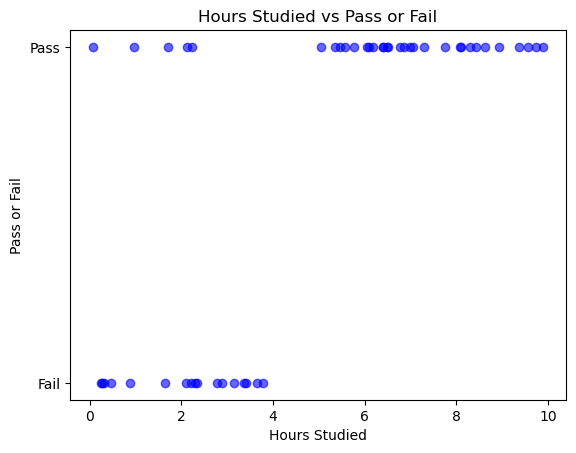

In [37]:
plt.scatter(df['Hours_Studied'], df['Pass'], color='blue', alpha=0.6)
plt.title('Hours Studied vs Pass or Fail')
plt.xlabel('Hours Studied')
plt.ylabel('Pass or Fail')
plt.yticks([0, 1], ['Fail', 'Pass'])  # Label the y-axis ticks
plt.show()

#### Separate Features and Target variable

In [82]:
X = df[['Hours_Studied']]  ## feature or independent variable 
y = df['Pass']  ## target or dependent variable
print(X.head()) 
print(y.head())

   Hours_Studied
0           6.39
1           0.25
2           2.23
3           6.77
4           8.92
0    1
1    0
2    1
3    1
4    1
Name: Pass, dtype: int64


#### Separate training and testing data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
print(X_test.shape)
print(y_test.shape)

(10, 1)
(10,)


#### Train Logistic Regression Model with training data

In [43]:
model = LogisticRegression()  ## From sklearn.linear_model
model.fit(X_train, y_train)

LogisticRegression()

#### Predict target variable from testing data of the feature variable

In [87]:
y_pred = model.predict(X_test)
model.score(X_test,y_test) ## Accuracy of the model 

0.8

#### Print Confusion Matrix

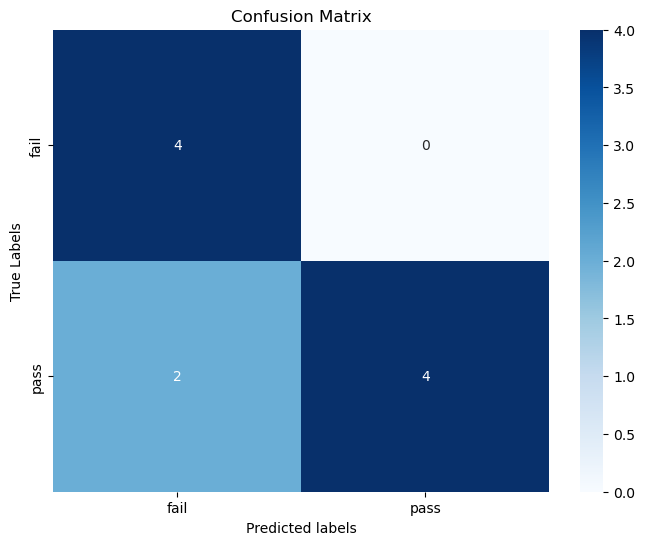

In [147]:
conf_matrx = confusion_matrix(y_test,y_pred)

## uses sns heatmap to display confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrx, annot =True, fmt ='d', cmap='Blues', xticklabels =['fail','pass'], yticklabels=['fail','pass'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True Labels')
plt.show()

#### Print Classification Report

In [150]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.67      0.80         6

    accuracy                           0.80        10
   macro avg       0.83      0.83      0.80        10
weighted avg       0.87      0.80      0.80        10



#### Prepare continous range of data and predict its propabilities for Logistic Curve

In [153]:
X_range = np.linspace(X['Hours_Studied'].min(), X['Hours_Studied'].max(), 300).reshape(-1, 1) ## Generate a continuous range of values for the logistic curve
X_range_df = pd.DataFrame(X_range, columns=['Hours_Studied']) ## converts to a pd dataframe to make it compatible with the model
y_prob = model.predict_proba(X_range_df)[:, 1] ## uses the model to predict the propability of each feature variable in X_range

#### Plot Logistic Curve

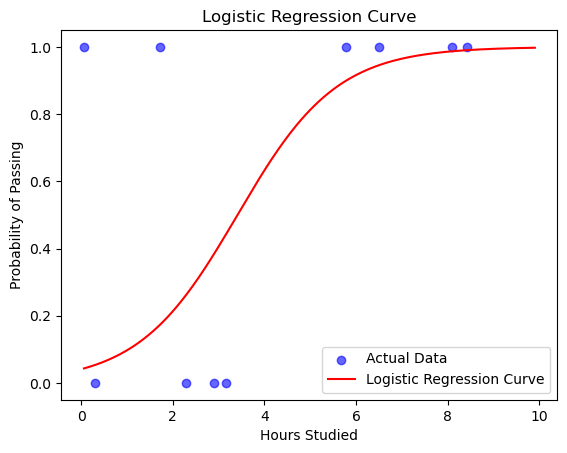

In [156]:
plt.scatter(X_test['Hours_Studied'], y_test, color='blue', alpha=0.6, label="Actual Data")
plt.plot(X_range, y_prob, color='red', label="Logistic Regression Curve")
plt.title("Logistic Regression Curve")
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.legend()
plt.show()